python -m mlflow server --host 127.0.0.1 --port 8080

In [18]:
#silence git warning
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import mlflow
import mlflow.tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# mlflow autolog
mlflow.tensorflow.autolog()
mlflow.set_tracking_uri(uri = "http://localhost:8080")
mlflow.set_experiment("MNIST_CNN")

<Experiment: artifact_location='mlflow-artifacts:/374122784360957763', creation_time=1759604292068, experiment_id='374122784360957763', last_update_time=1759604292068, lifecycle_stage='active', name='MNIST_CNN', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [21]:
# data load,reshape 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 
x_train = x_train.reshape(60000, 28, 28, 1) 
x_test = x_test.reshape(10000, 28, 28, 1)

In [22]:
#CNN builder function

def CNN_3_Layer():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 32, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 32, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name = "nmist_CNN")

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [23]:
def CNN_1_Layer():
    model = keras.Sequential([
        layers.Input(shape = (28,28,1)), 
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

def CNN_v6(input_shape=(28, 28, 1), num_classes=10, learning_rate=0.0005):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(32, (5, 5), strides=2, padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),
        Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [24]:
def CNN_2_Layer():
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (2, 2), activation='relu', padding='valid'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(64, (2, 2), activation='relu', padding='valid'),
        layers.Dropout(0.1),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [87]:
def CNN_opt():
    model = keras.Sequential([
        layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer_adam,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [83]:
model = CNN_opt()
run_name = 'CNN_opt'

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose = 1,
    mode = 'min'
)

checkpoint = ModelCheckpoint(
    filepath = run_name + '_bw.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [86]:
#fit + log
with mlflow.start_run(run_name = run_name):
    # Train model
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=10,
        validation_split=0.2,
        #callbacks=[early_stop, checkpoint],
        verbose=1
    )

Epoch 1/10
🏃 View run CNN_opt at: http://localhost:8080/#/experiments/374122784360957763/runs/9403f0453fd140599cb9bfb0c7dff3b9
🧪 View experiment at: http://localhost:8080/#/experiments/374122784360957763


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(128,), output.shape=(128, 4, 4, 10)

In [62]:
#mnist test
model.evaluate(x_test, y_test, batch_size = 128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9866 - loss: 0.0447


[0.044717952609062195, 0.9865999817848206]

In [54]:
model.summary()

Model: "nmist_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501,344 (1.91 MB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 334,230 (1.27 MB)

In [36]:
model.save(run_name + '_bw.h5')

In [63]:
#USPS dataset

import kagglehub
path = kagglehub.dataset_download("bistaumanga/usps-dataset") + '/usps.h5'

import h5py
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]
import tensorflow as tf
import numpy as np

X_te = X_te.astype("float32")
y_te = y_te.astype("int")

X_te = X_te.reshape(-1, 16, 16, 1)
X_te = tf.image.resize(X_te, [28, 28]).numpy()
X_te /= 255.0

print(X_te.shape)
print(y_te.shape)


(2007, 28, 28, 1)
(2007,)


In [65]:
loss, accuracy = model.evaluate(X_te, y_te, verbose=2)

63/63 - 0s - 6ms/step - accuracy: 0.0827 - loss: 2.3274


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 


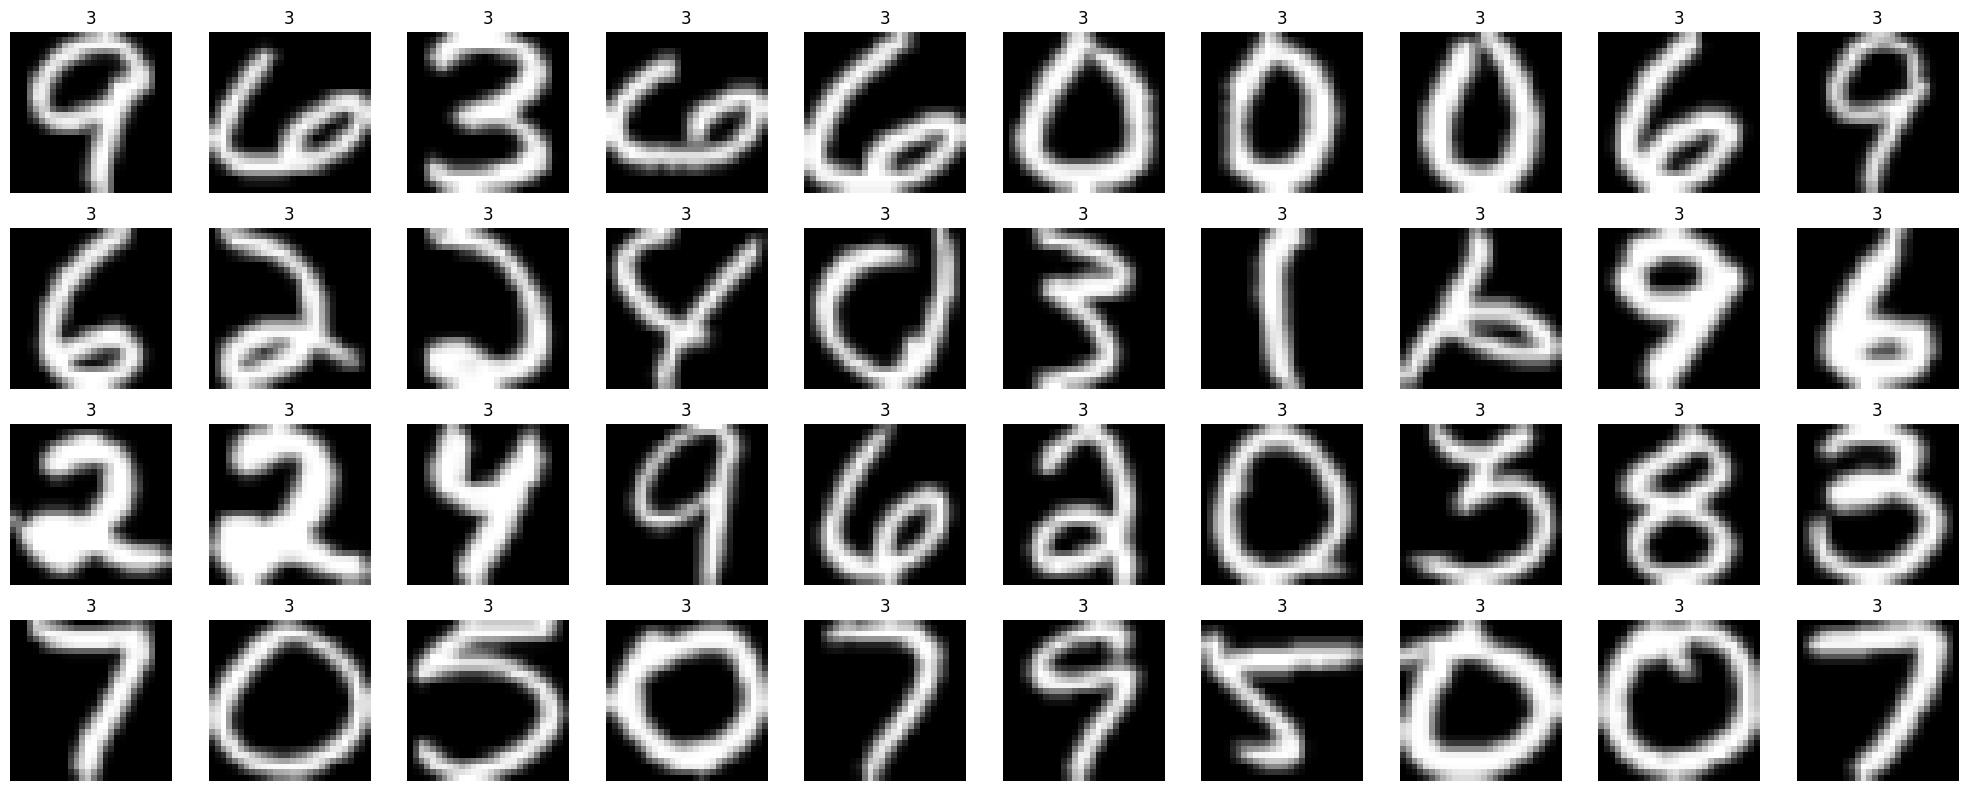

In [66]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_te[:40])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 8))  # wider and taller for 4 rows

rows = 4
cols = 10

for i in range(40):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_te[i].squeeze(), cmap='gray')
    plt.title(f"{predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
